In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

# Import Data

In [9]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# Exploratory Data Analysis (EDA)

### Target

In [10]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Numeric VS Target

C:\Users\ACER\AppData\Local\Temp\ipykernel_18372\3778613293.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age[df.Survived == 0] , bins=[0, 5, 12, 18, 40, 120], color="r", label="Not Survived")
C:\Users\ACER\AppData\Local\Temp\ipykernel_18372\3778613293.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

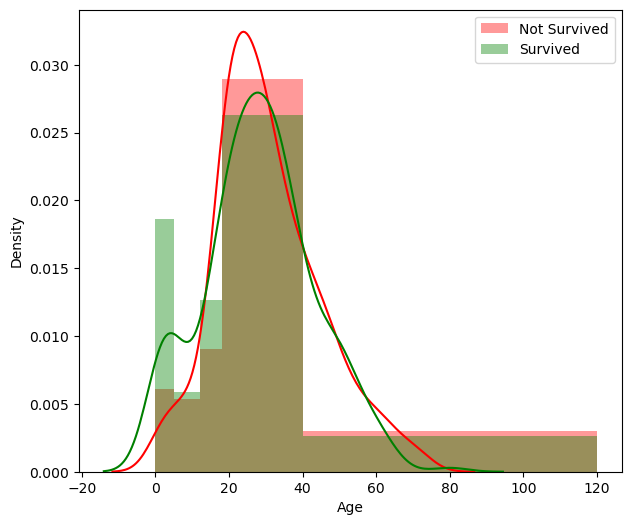

In [17]:
plt.figure(figsize=(7, 6))
sns.distplot(df.Age[df.Survived == 0] , bins=[0, 5, 12, 18, 40, 120], color="r", label="Not Survived")
sns.distplot(df.Age[df.Survived == 1], bins=[0, 5, 12, 18, 40, 120], color="g", label="Survived")
plt.legend();

C:\Users\ACER\AppData\Local\Temp\ipykernel_18372\3681631198.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Fare[df.Survived == 0] , bins=25, color="r", label="Not Survived")
C:\Users\ACER\AppData\Local\Temp\ipykernel_18372\3681631198.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df

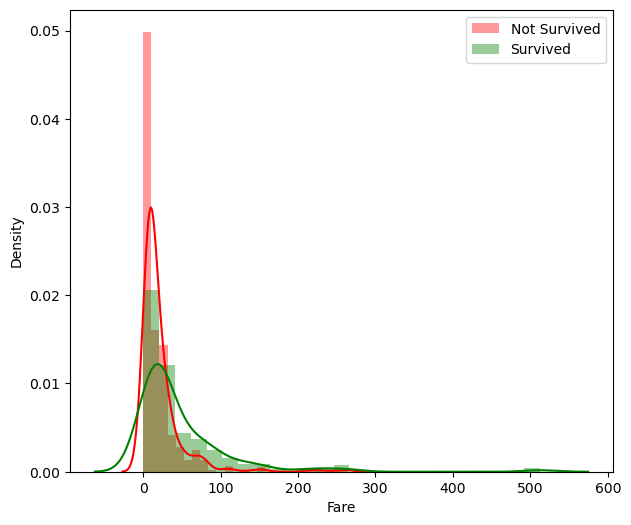

In [19]:
plt.figure(figsize=(7, 6))
sns.distplot(df.Fare[df.Survived == 0] , bins=25, color="r", label="Not Survived")
sns.distplot(df.Fare[df.Survived == 1], bins=25, color="g", label="Survived")
plt.legend();

### Categoric (Ordinal) Vs Target

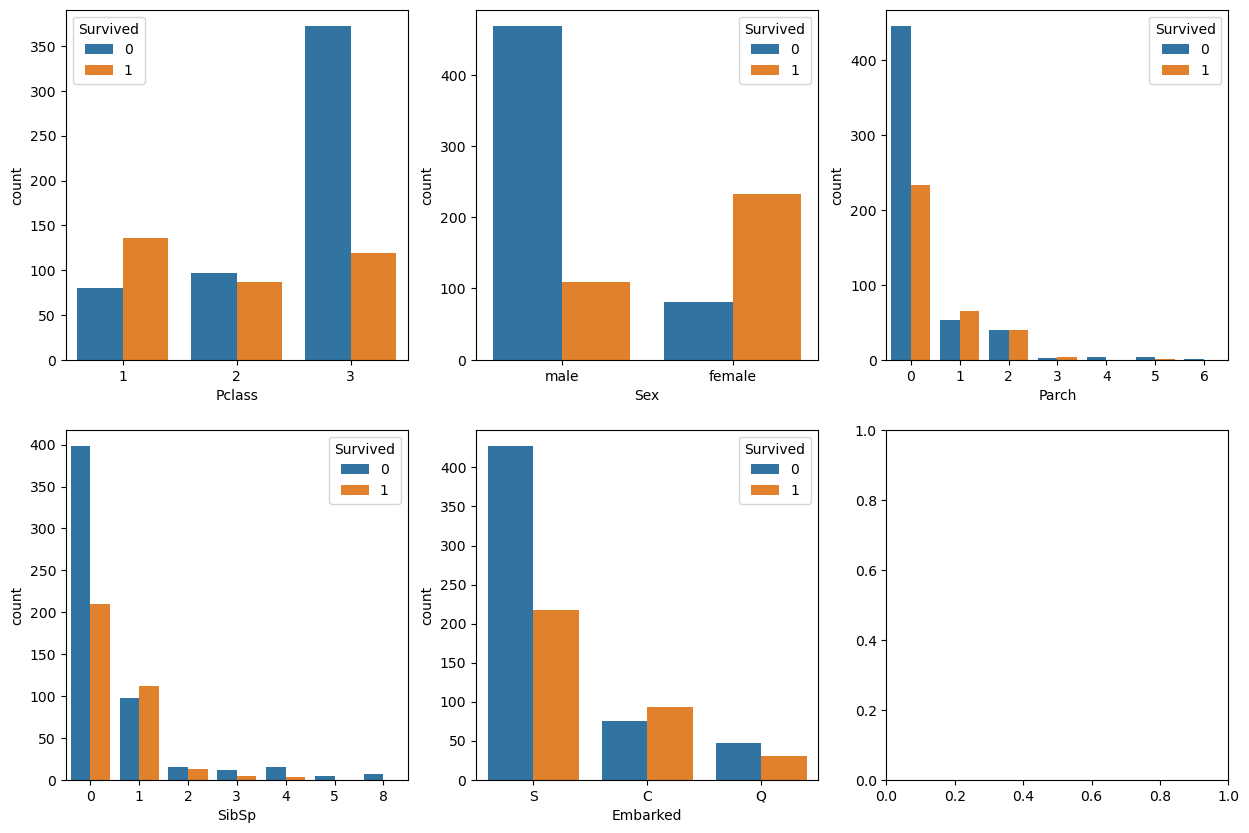

In [23]:
cat_var = ["Pclass", "Sex", "Parch", "SibSp", "Embarked"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(x=cat, data=df, hue="Survived", ax=ax)